In [99]:
import seaborn as sns
import pandas as pd
import numpy as np
np.random.seed(1337)
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas import read_csv
from matplotlib import pyplot as plt
import sklearn
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier as Rdf
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score




In [68]:
train = pd.read_csv('/Users/quent1/Library/CloudStorage/OneDrive-CranfieldUniversity/SSL Assignment/TimeToFail_prediction-master/train_selected.csv')
test = pd.read_csv(r'/Users/quent1/Library/CloudStorage/OneDrive-CranfieldUniversity/SSL Assignment/TimeToFail_prediction-master/test_selected.csv')
test_ttf = pd.read_csv(r'/Users/quent1/Library/CloudStorage/OneDrive-CranfieldUniversity/SSL Assignment/TimeToFail_prediction-master/test_selected_ttf.csv')


In [69]:
X_train = train.values[:,1:6]
X_train[0]
Y_train = train.values[:,7]
Y_train
X_train

array([[1.00000e+00, 1.40060e+03, 5.54360e+02, 4.74700e+01, 5.21660e+02],
       [2.00000e+00, 1.40314e+03, 5.53750e+02, 4.74900e+01, 5.22280e+02],
       [3.00000e+00, 1.40420e+03, 5.54260e+02, 4.72700e+01, 5.22420e+02],
       ...,
       [1.98000e+02, 1.42818e+03, 5.50940e+02, 4.80900e+01, 5.20010e+02],
       [1.99000e+02, 1.42653e+03, 5.50680e+02, 4.83900e+01, 5.19670e+02],
       [2.00000e+02, 1.43214e+03, 5.50790e+02, 4.82000e+01, 5.19300e+02]])

In [70]:
X_test = test.values[:,1:6]
pd.DataFrame(X_test)

,0,1,2,3,4
0,31.0,1398.91,554.42,47.23,521.79
1,49.0,1410.83,553.52,47.67,521.74
2,126.0,1418.89,552.59,47.88,520.83
3,106.0,1406.88,552.64,47.65,521.88
4,98.0,1419.36,553.29,47.46,521.00
...,...,...,...,...,...
95,97.0,1397.94,553.99,47.14,522.30
96,134.0,1410.92,554.05,47.38,521.58
97,121.0,1415.47,553.44,47.66,521.53
98,97.0,1397.98,554.75,47.26,521.82


In [71]:
Y_test = test_ttf.values[:,7]


In [72]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled =  scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pd.DataFrame(X_train_scaled)

,0,1,2,3,4
0,0.000000,0.309757,0.726248,0.369048,0.633262
1,0.002770,0.352633,0.628019,0.380952,0.765458
2,0.005540,0.370527,0.710145,0.250000,0.795309
3,0.008310,0.331195,0.740741,0.166667,0.889126
4,0.011080,0.404625,0.668277,0.255952,0.746269
...,...,...,...,...,...
20626,0.540166,0.782917,0.254428,0.726190,0.170576
20627,0.542936,0.866475,0.162641,0.708333,0.211087
20628,0.545706,0.775321,0.175523,0.738095,0.281450
20629,0.548476,0.747468,0.133655,0.916667,0.208955


In [73]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(X_train_scaled,Y_train)
Y_predicted_LogReg = LogReg.predict(X_test_scaled)
acc_LogReg= accuracy_score(Y_test, Y_predicted_LogReg )
print(classification_report(Y_test,Y_predicted_LogReg))

              precision    recall  f1-score   support

         0.0       0.90      0.97      0.94        75
         1.0       0.89      0.68      0.77        25

    accuracy                           0.90       100
   macro avg       0.90      0.83      0.85       100
weighted avg       0.90      0.90      0.90       100



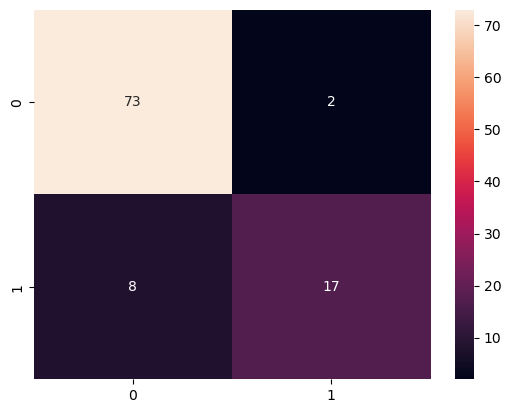

<Figure size 400x400 with 0 Axes>

In [74]:
confusion_matrixx = confusion_matrix(Y_test.tolist(),Y_predicted_LogReg.tolist())
sns.heatmap(confusion_matrixx,annot =True)
plt.figure(figsize=(4,4))
plt.show()

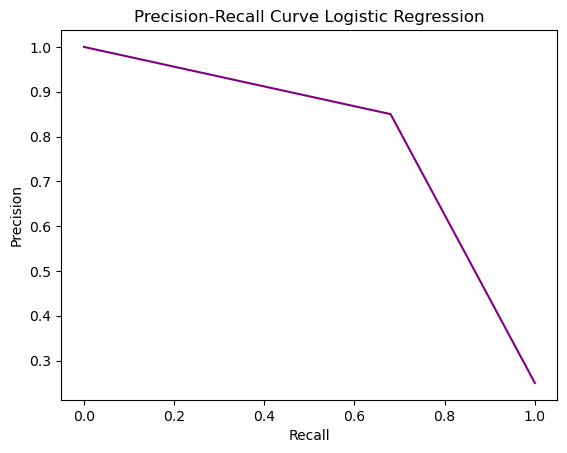

In [106]:
from sklearn.metrics import precision_recall_curve

#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(Y_test, Y_predicted_LogReg)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve Logistic Regression')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

KNN

In [107]:
from sklearn.neighbors import KNeighborsClassifier
KNN_clf = KNeighborsClassifier()
KNN_clf.fit(X_train_scaled,Y_train)
Y_predicted_Knn = KNN_clf.predict(X_test_scaled)
acc_KNN= accuracy_score(Y_test, Y_predicted_Knn )
print(classification_report(Y_test,Y_predicted_Knn))

              precision    recall  f1-score   support

         0.0       0.89      0.96      0.92        75
         1.0       0.84      0.64      0.73        25

    accuracy                           0.88       100
   macro avg       0.87      0.80      0.83       100
weighted avg       0.88      0.88      0.87       100



/Users/quent1/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


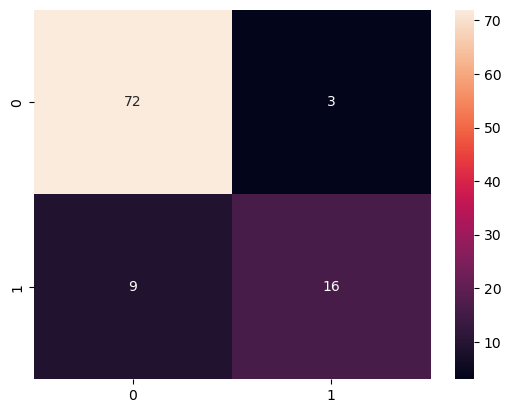

<Figure size 400x400 with 0 Axes>

In [109]:
confusion_matrixx = confusion_matrix(Y_test.tolist(),Y_predicted_Knn.tolist())
sns.heatmap(confusion_matrixx,annot =True)
plt.figure(figsize=(4,4))
plt.show()

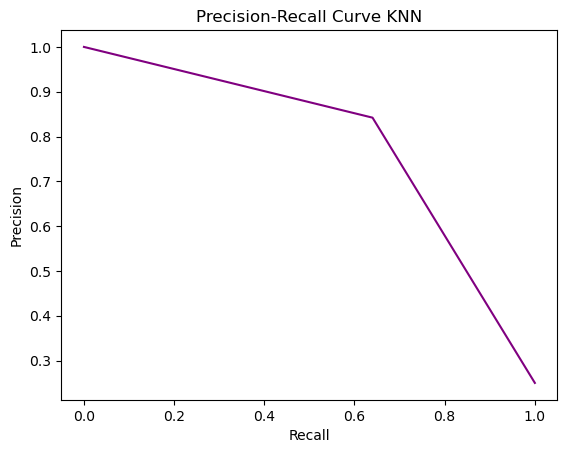

In [111]:
from sklearn.metrics import precision_recall_curve

#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(Y_test, Y_predicted_Knn)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve KNN')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

In [75]:
clf = Rdf()
clf.fit(X_train_scaled, Y_train)

RandomForestClassifier()

In [76]:
Y_predicted_RDF = clf.predict(X_test_scaled)
print(classification_report(Y_test,Y_predicted_RDF))

              precision    recall  f1-score   support

         0.0       0.89      0.96      0.92        75
         1.0       0.84      0.64      0.73        25

    accuracy                           0.88       100
   macro avg       0.87      0.80      0.83       100
weighted avg       0.88      0.88      0.87       100



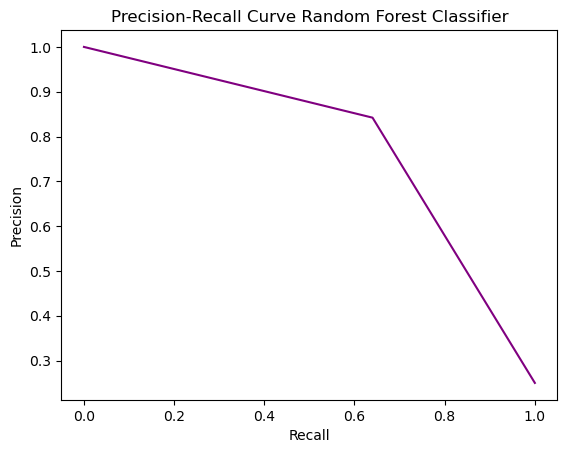

In [104]:
from sklearn.metrics import precision_recall_curve

#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(Y_test, Y_predicted_RDF)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve Random Forest Classifier')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

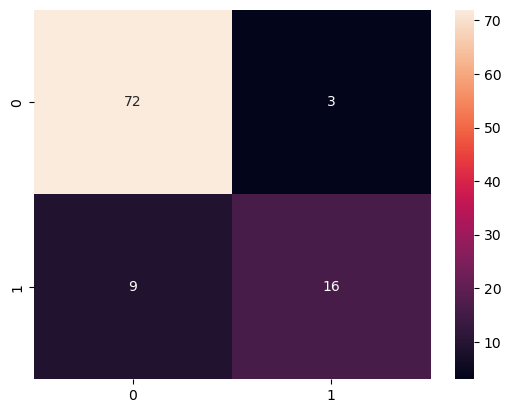

<Figure size 400x400 with 0 Axes>

In [77]:
confusion_matrixx = confusion_matrix(Y_test.tolist(),Y_predicted_RDF.tolist())
sns.heatmap(confusion_matrixx,annot =True)
plt.figure(figsize=(4,4))
plt.show()

In [ ]:
Y_predicted_LogReg.tolist()

In [79]:
Y_predicted_RDF.shape

(100,)

In [86]:
# define search space
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

space = dict()
LogReg = LogisticRegression()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
# define search
search = GridSearchCV(LogReg, space, scoring='accuracy', n_jobs=-1, cv=cv)
# execute search
result = search.fit(X_train_scaled, Y_train)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

/Users/quent1/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/quent1/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/quent1/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/quent1/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/quent1/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/quent1/opt/anaconda3/lib/python3.9/sit

Best Score: 0.9467146951142374
Best Hyperparameters: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}


/Users/quent1/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
1440 fits failed out of a total of 2880.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/quent1/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/quent1/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/quent1/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.p

In [90]:
LogReg = LogisticRegression( C = 100, penalty= 'l2', solver='liblinear')
LogReg.fit(X_train_scaled,Y_train)
Y_predicted_LogReg = LogReg.predict(X_test_scaled)
acc_LogReg= accuracy_score(Y_test, Y_predicted_LogReg )
print(classification_report(Y_test,Y_predicted_LogReg))
{'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}

              precision    recall  f1-score   support

         0.0       0.90      0.97      0.94        75
         1.0       0.89      0.68      0.77        25

    accuracy                           0.90       100
   macro avg       0.90      0.83      0.85       100
weighted avg       0.90      0.90      0.90       100



{'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}

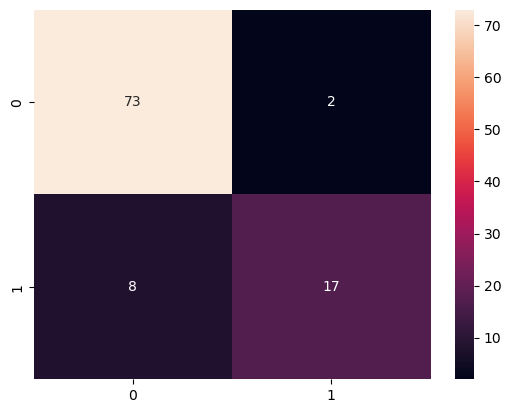

<Figure size 400x400 with 0 Axes>

In [94]:
confusion_matrixx = confusion_matrix(Y_test.tolist(),Y_predicted_LogReg.tolist())
sns.heatmap(confusion_matrixx,annot =True)
plt.figure(figsize=(4,4))
plt.show()

In [92]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [93]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = LogReg = Rdf()
()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_scaled, Y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=  11.3s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=  11.3s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=  11.5s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=  11.6s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=  11.5s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=  51.3s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; to

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [97]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = Rdf(n_estimators = 10, random_state = 42)
base_model.fit(X_train_scaled, Y_train)
base_accuracy = evaluate(base_model, X_test_scaled, Y_test)

best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test_scaled, Y_test )

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))


/var/folders/16/4bykjl2540q7yyzlbgx2p7_r0000gn/T/ipykernel_17966/3067318882.py:4: RuntimeWarning: divide by zero encountered in true_divide
  mape = 100 * np.mean(errors / test_labels)
/var/folders/16/4bykjl2540q7yyzlbgx2p7_r0000gn/T/ipykernel_17966/3067318882.py:4: RuntimeWarning: invalid value encountered in true_divide
  mape = 100 * np.mean(errors / test_labels)


Model Performance
Average Error: 0.1200 degrees.
Accuracy = nan%.
Model Performance
Average Error: 0.1100 degrees.
Accuracy = nan%.
Improvement of nan%.


/var/folders/16/4bykjl2540q7yyzlbgx2p7_r0000gn/T/ipykernel_17966/3067318882.py:4: RuntimeWarning: divide by zero encountered in true_divide
  mape = 100 * np.mean(errors / test_labels)
/var/folders/16/4bykjl2540q7yyzlbgx2p7_r0000gn/T/ipykernel_17966/3067318882.py:4: RuntimeWarning: invalid value encountered in true_divide
  mape = 100 * np.mean(errors / test_labels)


In [113]:
Y_predicted_LogReg = rf_random.predict(X_test_scaled)


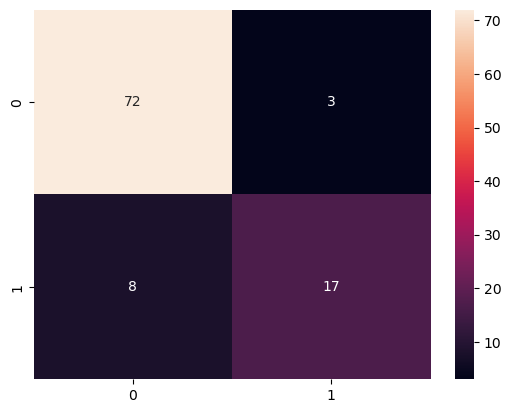

<Figure size 400x400 with 0 Axes>

In [114]:
confusion_matrixx = confusion_matrix(Y_test.tolist(),Y_predicted_LogReg.tolist())
sns.heatmap(confusion_matrixx,annot =True)
plt.figure(figsize=(4,4))
plt.show()

In [115]:
print(classification_report(Y_test,Y_predicted_LogReg.tolist()))

              precision    recall  f1-score   support

         0.0       0.90      0.96      0.93        75
         1.0       0.85      0.68      0.76        25

    accuracy                           0.89       100
   macro avg       0.88      0.82      0.84       100
weighted avg       0.89      0.89      0.89       100

